---

# TP1 : Traitement de fichiers, cryptanalyse, César et de Vigenère

Dans ce TP, on commence par effectuer quelques traitements sur des fichiers et des chaînes de caractères (`string`), puis on reprend la cryptanalyse du chiffrement de César et on la réinvestit dans la cryptanalyse du chiffrement de De Vigenère. 

Vous pourrez donc récupérer en partie le travail effectué en TD2 (objectif 20) et en TP1.




## Echauffement

### Retour sur le codage ascii

On rappelle l'énoncé de l'exercice 7 du TD2. 

L’ASCII est un codage de caractères qui définit 128 codes sur 7 bits. 
Chaque code correspond à un caractère : chiffres, lettres, symboles mathématiques et de ponctuation. 

En Python :
- la fonction `ord()` retourne le code ASCII d’un caractère fourni en argument,   
- la fonction `chr()` retourne le caractère associé à un code donné.  

Ecrire un programme qui affiche :
- le code ascii des majuscules 
- la table des 128 codes ASCII.


In [1]:
def affiche_ascci_MAJ():
    """
    # Affiche le code ASCII des majuscules

    les majuscules selon la table ASCII vont de 65 a 91
    on vas donc parcourir ces valeurs et afficher leurs char correspondant
    """
    print("Code ASCII des majuscules:")
    for lettre in range(ord('A'), ord('Z')):
        print(f"{chr(lettre)} : {lettre}")

def affiche_ascii_table():
    """
    Affiche la table des 128 codes ASCII
    on parcour simplement les 128 premier ASCII
    """
    print("\nTable des 128 codes ASCII:")
    for code in range(128):
        print(f"{code} : {chr(code)}")
    
affiche_ascci_MAJ()
affiche_ascii_table()

Code ASCII des majuscules:
A : 65
B : 66
C : 67
D : 68
E : 69
F : 70
G : 71
H : 72
I : 73
J : 74
K : 75
L : 76
M : 77
N : 78
O : 79
P : 80
Q : 81
R : 82
S : 83
T : 84
U : 85
V : 86
W : 87
X : 88
Y : 89

Table des 128 codes ASCII:
0 :  
1 : 
2 : 
3 : 
4 : 
5 : 
6 : 
7 : 
8 : 
9 : 	
10 : 

11 : 
12 : 
13 : 
14 : 
15 : 
16 : 
17 : 
18 : 
19 : 
20 : 
21 : 
22 : 
23 : 
24 : 
25 : 
26 : 
27 : 
28 : 
29 : 
30 : 
31 : 
32 :  
33 : !
34 : "
35 : #
36 : $
37 : %
38 : &
39 : '
40 : (
41 : )
42 : *
43 : +
44 : ,
45 : -
46 : .
47 : /
48 : 0
49 : 1
50 : 2
51 : 3
52 : 4
53 : 5
54 : 6
55 : 7
56 : 8
57 : 9
58 : :
59 : ;
60 : <
61 : =
62 : >
63 : ?
64 : @
65 : A
66 : B
67 : C
68 : D
69 : E
70 : F
71 : G
72 : H
73 : I
74 : J
75 : K
76 : L
77 : M
78 : N
79 : O
80 : P
81 : Q
82 : R
83 : S
84 : T
85 : U
86 : V
87 : W
88 : X
89 : Y
90 : Z
91 : [
92 : \
93 : ]
94 : ^
95 : _
96 : `
97 : a
98 : b
99 : c
100 : d
101 : e
102 : f
103 : g
104 : h
105 : i
106 : j
107 : k
108 : l
109 : m
1

## Traitement

### Préparation syntaxique

Dans le but de faire quelques traitements statistiques, et des chiffrements ultérieurs éventuels, écrire la fonction `traitementChaine()` qui :
- convertit la chaîne en minuscules (c'est conseillé, ça facilite la suite)
- remplace les caractères accentués par les caractères non accentués correspondants ;
- élimine les espaces, la ponctuation et les chiffres, sans oublier les retours à la ligne, les guillemets et autres tirets ... ; 
- enfin, convertit le tout en majuscules et renvoie la chaîne de caractères résultat.

On rappelle ici les méthodes utiles `.lower()`, `.upper()` et `.isalpha()`, pour le traitement des chaînes de caractères (type `string`) et présentées en cours (chapitre 3 : types composés).

In [2]:
def traitementChaine(chaine):
    """
    Cnvertion d'une chaine de caractere en une chaine en majuscule, sans accent et sans espace
    """
    # chaîne en minuscules
    chaine = chaine.lower()

    # dico de correspondance des caractères accentués
    dico_accent = {
        'à': 'a',       'â': 'a',       'ä': 'a',
        'é': 'e',       'è': 'e',       'ê': 'e',       'ë': 'e',
        'î': 'i',       'ï': 'i',
        'ô': 'o',       'ö': 'o',
        'ù': 'u',       'û': 'u',       'ü': 'u',
        'ç': 'c',
    }

    # remplacer les caractères accentués par leurs équivalents non accentués
    for accentue, non_accentue in dico_accent.items():
        chaine = chaine.replace(accentue, non_accentue)

    # suprimer les caractères (espaces, ponctuation, chiffres, etc.)
    chaine = ''.join(caractere for caractere in chaine if caractere.isalpha())

    # chaine en majuscules
    chaine = chaine.upper()

    return chaine

chaine_a_traiter = "Voici un eEXMPLE' pour le traitement de texte!"
chaine_traitee = traitementChaine(chaine_a_traiter)
print(chaine_traitee)  

VOICIUNEEXMPLEPOURLETRAITEMENTDETEXTE


### Vérification
Vérifier le bon comportement de votre fonction `traitement Chaine()` sur une chaîne de caractères entrée au clavier.  

In [3]:
def traitementChaine_input():
    """
    demande entré d'une chaine de caractere
    """
    
    chaine = input("entrer une chaine de caractere : ")
    res_traitement_chaine = traitementChaine(chaine)
    return res_traitement_chaine

res_traitementChaine_input = traitementChaine_input()
print(res_traitementChaine_input)

entrer une chaine de caractere : ab
AB


### Application à un fichier texte

Vous trouverez dans le dossier le fichier d'entrée `93.txt`, le roman bien connu de Victor Hugo (dont on vous conseille vivement la lecture !).

Effectuer le traitement suivant à l'aide de la fonction `traitementChaine()`. 
- Ouvrir et lire le contenu de ce fichier d'entrée, 
- effectuer la préparation syntaxique définie précédemment, 
- sauvegarder le résultat du traitement dans un nouveau fichier de sortie dénommé `93Out.txt`.


In [4]:
import os
def open_write_file_forTraitement(name_file,name_file_out):
    """
    lit un fichier txt et le convertit en une chaine de caractere special avec fonction
    traitementChaine et retourne un fichier txt en sorit avec la convertion

    Q1.2.4 : wc -m 93Out.txt = 532873 
    """

    # ouvrir et lire le fichier d'entrée
    nom_fichier_entree = str(name_file)

    with open(nom_fichier_entree, 'r') as fichier_entree:
        contenu = fichier_entree.read()

    # appliquer le traitement à la chaîne lue
    contenu_traite = traitementChaine(contenu)


    # nom du fichier de sortie par default
    nom_dossier_sortie = "OUT"
    nom_fichier_sortie = os.path.join(nom_dossier_sortie, name_file_out)


    # verifier si le fichier de sortie existe, sinon le créer
    if not os.path.exists(nom_fichier_sortie):
        open(nom_fichier_sortie, 'w').close()

    # Save le résultat dans 93Out.txt
    with open(nom_fichier_sortie, 'w') as fichier_sortie:
        fichier_sortie.write(contenu_traite)

    print("Traitement terminé. Résultat sauvegardé dans", nom_fichier_sortie)
    
open_write_file_forTraitement("93.txt","93Out.txt")

Traitement terminé. Résultat sauvegardé dans OUT/93Out.txt


### Autres vérifications
Vérifier l'effet de votre préparation :
- en regardant sous l'éditeur le fichier texte généré,  
- ou à l'aide de la commande Unix `wc`  

In [5]:
print( "Q1.2.4 : wc -m 93Out.txt = 532873 editeur de texte meme chose !" )

Q1.2.4 : wc -m 93Out.txt = 532873 editeur de texte meme chose !


### Traitements statistiques


#### Apparition de lettres : dénombrement, fréquences
Dans ce qui suit, on considère une chaîne de caractères arbitraire _mais_ en majuscules, sans espace ni ponctuction.  

Pour un telle chaîne, écrire les fonctions :
- `nb_apparitions()` qui compte le nombre d'apparitions de chacune des lettres majuscules (de 'A' à 'Z') dans cette chaîne ;
- `frequences()` qui calcule les fréquences de ces apparitions dans cette chaîne ;
    - cette fonction permettra de sauvegarder _éventuellement_ ces fréquences dans un fichier de sortie ;
    - dans ce cas, le nom du fichier sera défini comme un paramètre de cette fonction.
    - Chaque ligne du fichier respectera le format suivant :
    ```A	9.180%```

**Rmq.** Vous pouvez reprendre et adapter les développements du TP1.  

In [6]:
def nb_apparitions(chaine):
    """
    compte le nombre d'occurance de chaque lettre dans une chaine de caractere
    """

    dico_apparitions = {}
    for lettre in chaine :
        if 'A' <= lettre <= 'Z' :
            if lettre in dico_apparitions :
                dico_apparitions[lettre] += 1
            else :
                dico_apparitions[lettre] = 1

    # tri du dico par ordre alphabetique
    dico_apparitions_tri = {lettre: dico_apparitions[lettre] for lettre in sorted(dico_apparitions.keys())}
    
    return dico_apparitions_tri


def frequences(dico):
    """
    Retounre les frequences d'apparition de chaques lettres contenue dans un dico
    """

    total_occurrences = sum(dico.values())

    # calcule des frequences
    for cle in dico:
        if dico[cle] != 0:
            dico[cle] = (dico[cle] / total_occurrences) * 100

    return dico


chaine = "VOICIUNECHAINEDECARACTEREPOURCETTEEXEMPLE"
res_apparition = nb_apparitions(chaine)
print(res_apparition,"\n")
res_frequence = frequences(res_apparition)
print(res_frequence)

{'A': 3, 'C': 5, 'D': 1, 'E': 10, 'H': 1, 'I': 3, 'L': 1, 'M': 1, 'N': 2, 'O': 2, 'P': 2, 'R': 3, 'T': 3, 'U': 2, 'V': 1, 'X': 1} 

{'A': 7.317073170731707, 'C': 12.195121951219512, 'D': 2.4390243902439024, 'E': 24.390243902439025, 'H': 2.4390243902439024, 'I': 7.317073170731707, 'L': 2.4390243902439024, 'M': 2.4390243902439024, 'N': 4.878048780487805, 'O': 4.878048780487805, 'P': 4.878048780487805, 'R': 7.317073170731707, 'T': 7.317073170731707, 'U': 4.878048780487805, 'V': 2.4390243902439024, 'X': 2.4390243902439024}


#### Application à 93, roman de V. Hugo

On dispose maintenant d'un fichier `93Out.txt` contenant une chaîne de caractères composée uniquement de majuscules, sans espace ni ponctuation. 
On peut procéder au calcul de quelques statistiques.

- Appliquer les fonctions précédentes au contenu du fichier `93Out.txt` et 
- tracer (avec `matplotlib`) les histogrammes de ces apparitions et des fréquences
- sauvegarder les fréquences dans un fichier `freq93.txt`
- sauvegarder les histogrammes dans des fichiers images `hist_app93.png`et `hist_freq93.png`     

{'A': 48919, 'B': 6099, 'C': 17346, 'D': 19214, 'E': 90189, 'F': 6056, 'G': 5805, 'H': 5409, 'I': 39399, 'J': 2061, 'K': 29, 'L': 32159, 'M': 14332, 'N': 35458, 'O': 27627, 'P': 13265, 'Q': 5805, 'R': 34519, 'S': 39808, 'T': 41516, 'U': 33347, 'V': 9604, 'W': 23, 'X': 2158, 'Y': 1775, 'Z': 919} 

{'A': 9.1807875144743, 'B': 1.1446191265311791, 'C': 3.2553801227758377, 'D': 3.6059537460518243, 'E': 16.92606237132653, 'F': 1.1365491769589802, 'G': 1.0894431922468428, 'H': 1.0151245868842675, 'I': 7.39413821383865, 'J': 0.38679455972794885, 'K': 0.005442524130087587, 'L': 6.035383913775403, 'M': 2.6897329597384587, 'N': 6.6545179518843325, 'O': 5.18484876351482, 'P': 2.4894856064004083, 'Q': 1.0894431922468428, 'R': 6.4782927740170155, 'S': 7.470896571397471, 'T': 7.791442475335043, 'U': 6.25833972986313, 'V': 1.8024138532883167, 'W': 0.004316484654897052, 'X': 0.4049988645768625, 'Y': 0.3331200114105334, 'Z': 0.17247171295001698} 

Traitement terminé. Résultat sauvegardé dans OUT/freq_Ou

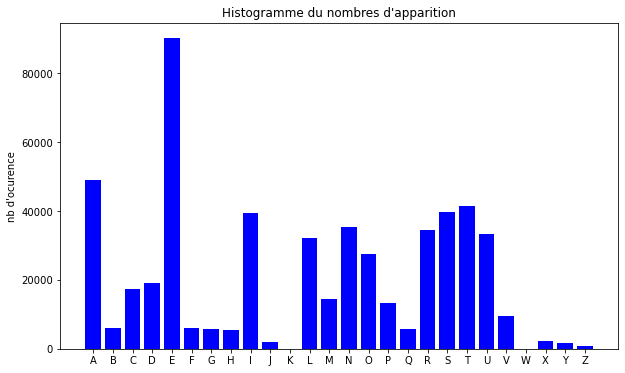

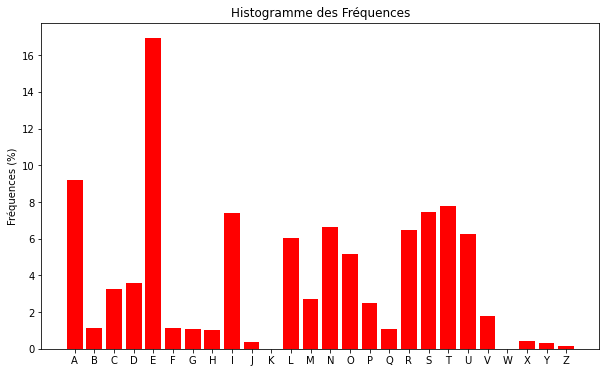

In [7]:
import matplotlib.pyplot as plt

def lire_fichier_apparition(name_file):
    """
    Lire un fichier en entrer est compter le chaque occurence d'un caractere dans le texte
    """

    # ouvrir et lire le fichier d'entrée
    nom_fichier_entree = str(name_file)

    with open("./OUT/"+nom_fichier_entree, 'r') as fichier_entree:
        contenu = fichier_entree.read()

    return nb_apparitions(contenu)


def write_frequences_in_file(dico, name_file_out) :
    """
    ecrie dans un fichier les frequences recupérer en entré d'un dictionnaire pour ensuite les ecrire dans un 
    fichier texte donné en entré
    """
    
    
    nom_dossier_sortie = "OUT"

    # nom du fichier de sortie par defaut
    nom_fichier_sortie = os.path.join(nom_dossier_sortie, name_file_out)

    dico = frequences(dico)

    # verifier si le fichier de sortie existe, sinon le créer
    if not os.path.exists(nom_fichier_sortie):
        open(nom_fichier_sortie, 'w').close()

    # save le résultat dans freq93.txt
    with open(nom_fichier_sortie, 'w') as fichier_sortie:
        # Parcourir le dictionnaire
        for cle, valeur in dico.items():
            ecriture = f"{cle} {valeur:.2f} %\n"
            fichier_sortie.write(ecriture)

    print("Traitement terminé. Résultat sauvegardé dans", nom_fichier_sortie)


def lire_fichier_frequences(nom_fichier):
    """
    lit un fichier qui contient les frequences entré sous la forme specifique a la fonction write_frequences_in_file()
    """
    lettres = []
    frequences = []

    with open("./OUT/"+nom_fichier, 'r') as fichier:
        lignes = fichier.readlines()

        # on lit chaque ligne une a une
        for ligne in lignes:
            lettre, frequence = ligne.split()[0], ligne.split()[1]
            lettres.append(lettre)
            frequences.append(float(frequence))

    return lettres, frequences


def histogrammes(name_file,fichier_de_sortit):
    """
    Création d'un histogramme représenatant les donnés des frequences et nb_apparition donné par des fichier 
    """

    lettres = lire_fichier_frequences(name_file)[0]
    frequences = lire_fichier_frequences(name_file)[1]

    res = lire_fichier_apparition(fichier_de_sortit)

    # récupérer les valeurs du dictionnaire pour les ocurences
    valeurs = res.values()
    liste_de_valeurs = list(valeurs)


    # créer histogrammes occurence #
    fig,histo_freq = plt.subplots(1, 1, figsize=(10, 6))

    histo_freq.bar(lettres, liste_de_valeurs, color="blue")
    histo_freq.set_ylabel("nb d'ocurence")
    histo_freq.set_title("Histogramme du nombres d'apparition")

    # save l'histogramme occurence
    fig.savefig("Image/hist_app93.png")

    print("histogramme terminé. Résultat sauvegardé dans", 'Image/hist_app93.png')

    # créer histogrammes frequence #
    fig, (histo_freq) = plt.subplots(1, 1, figsize=(10, 6))

    histo_freq.bar(lettres, frequences, color="red")
    histo_freq.set_ylabel("Fréquences (%)")
    histo_freq.set_title("Histogramme des Fréquences")

    fig.savefig("Image/hist_freq93.png")

    print("histogramme terminé. Résultat sauvegardé dans", 'Image/hist_freq93.png')

    # afficher les histogrammes
    plt.show()

    

    
    

fichier_de_sortit = "93Out.txt"    
fichier = lire_fichier_apparition(fichier_de_sortit)
print(fichier,"\n")

#calcule des frequences
frequence = frequences(fichier)
print(frequence,"\n")

#écrire les freq dans un fichier
write_frequences_in_file(frequence, "freq_Out.txt")

#Créeation histogrammes
histogrammes("freq_Out.txt",fichier_de_sortit)    

#### Apparitions de digrammes
Un _digramme_ (ou _bigramme_) est un motif de deux lettres.  
On considère les digrammes suivants :
'ES','DE','LE','EN','RE','NT','ON','ER','TE','EL','AN','SE','ET','LA','AI','IT','ME','OU','EM','IE'.

- Ecrire une fonction `nb_digrammes()` qui compte le nombre d'apparitions d'un bigramme donné dans une chaîne de caractères arbitraire.

In [8]:
def nb_digrammes(chaine) :
    """
    compte le nombre d'apparitions d'un bigramme donné dans une chaîne de caractères arbitraire.
    """

    dico_digrammes = {
        'ES' : 0,'DE' : 0,'LE' : 0,
        'EN' : 0,'RE' : 0,'NT' : 0,
        'ON' : 0,'ER' : 0,'TE' : 0,
        'EL' : 0,'AN' : 0,'SE' : 0,
        'ET' : 0,'LA' : 0,'AI' : 0,
        'IT' : 0,'ME' : 0,'OU' : 0,
        'EM' : 0,'IE' : 0
    }

    for i in range(len(chaine) - 1):
        bigramme = chaine[i:i+2]
        if bigramme in dico_digrammes:
            dico_digrammes[bigramme] += 1

    return dico_digrammes

chaine = "VOICIEUNECHAINEARBITRAIREPOURTESTERLAFONCTION"
res_nb_digrammes = nb_digrammes(chaine)
print(res_nb_digrammes)

{'ES': 1, 'DE': 0, 'LE': 0, 'EN': 0, 'RE': 1, 'NT': 0, 'ON': 2, 'ER': 1, 'TE': 2, 'EL': 0, 'AN': 0, 'SE': 0, 'ET': 0, 'LA': 1, 'AI': 2, 'IT': 1, 'ME': 0, 'OU': 1, 'EM': 0, 'IE': 1}


- Appliquer cette fonction au contenu du fichier `93Out.txt` 
    - les nombres d'apparitions de digrammes seront stockés avec un dictionnaire adapté
- et tracer un premier histogramme d'apparition des digrammes définis ci-dessus.

In [9]:
def lire_fichier_to_chaine(name_file) :
    """
    lit un fichier et retourne la chaine de caractere du fichier
    """

    with open("./OUT/"+name_file, 'r') as fichier:
        lignes = fichier.read()

    return lignes



fichier_de_sortit = "93Out.txt"
chaine = lire_fichier_to_chaine(fichier_de_sortit)
res_nb_digrammes = nb_digrammes(chaine)
print(res_nb_digrammes)

{'ES': 14576, 'DE': 10162, 'LE': 12215, 'EN': 10115, 'RE': 10993, 'NT': 8372, 'ON': 7176, 'ER': 7804, 'TE': 8739, 'EL': 7146, 'AN': 6692, 'SE': 6724, 'ET': 9801, 'LA': 8234, 'AI': 10923, 'IT': 8628, 'ME': 4643, 'OU': 7892, 'EM': 4034, 'IE': 5548}


#### Histogramme ordonné 

Reprendre les valeurs d'apparitions précédentes et tracer un histogramme ordonnés par nombre d'apparitions décroissant. 

**Indication :** Un dictionnaire python est une structure de donnée non ordonnable. 

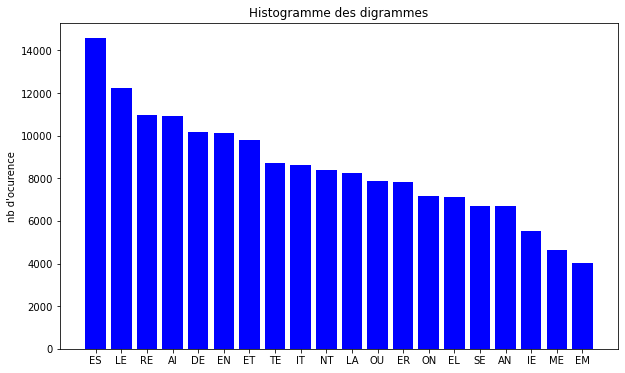

histogramme terminé. Résultat sauvegardé dans Image/histo_bigramme.png


In [10]:
def histogrammes_ord_bigrammes(dico) :
    """
    Réalise l'histogramme des bigrammes par valeurs les plus observés 
    """
    
    # fichier ou on savegarde le fichier
    fichier_save = 'Image/histo_bigramme.png'

    # Trie le dictionnaire par les valeurs
    res = list(dico.items())
    res = sorted(res,key=lambda x:x[1],reverse=True)
    res = dict(res)

    liste_bigrammes = list(res.keys())
    liste_nombres = list(res.values())

    fig, (fig1) = plt.subplots(1, 1, figsize=(10, 6))

    fig1.bar(liste_bigrammes, liste_nombres, color='blue')
    fig1.set_ylabel("nb d'ocurence")
    fig1.set_title('Histogramme des digrammes')

    fig.savefig(fichier_save)

    # Afficher l'histogramme
    plt.show()

    print("histogramme terminé. Résultat sauvegardé dans", fichier_save)
    
histogrammes_ord_bigrammes(res_nb_digrammes)

### Analyse
Comparer vos statistiques avec les fréquences des lettres et bigrammes données pour la langue française (par exemple : http://www.apprendre-en-ligne.net/crypto/stat/francais.html ).  
Conclure quant au roman de Victor Hugo.

VOTRE REPONSE ICI

oui ça correspond approximatvement 

ce que j'obtient 
{'ES': 14576, 'DE': 10162, 'LE': 12215, 'EN': 10115, 'RE': 10993, 'NT': 8372, 'ON': 7176, 'ER': 7804, 'TE': 8739, 'EL': 7146, 'AN': 6692, 'SE': 6724, 'ET': 9801, 'LA': 8234, 'AI': 10923, 'IT': 8628, 'ME': 4643, 'OU': 7892, 'EM': 4034, 'IE': 5548}

bigrammes de la langue française les plus utilisées :

ES, LE, DE, RE, EN, ON, NT, ER etc....


## 2 César

### Chiffrement de César

Écrire un premier programme qui :
- lit une chaîne de caractères arbitraire entrée au clavier ;
- effectue le traitement de cette chaîne avec la fonction `traitementChaine()` écrite plus haut ;
- définit une fonction `cesar()` prenant en entrée la chaîne de caractères et une clé de chiffrement $k \in \{0,\ldots,25\}$  
    - la clé est entrée au clavier, 
    - ou choisie aléatoirement (par exemple si la clé entrée au clavier est négative);
- puis détermine la chaîne de caractères chiffrée,
- et l'affiche à l'écran.

**Rmq.** La valeur entière $k$ définit le nombre de décalages du chiffrement de César. 
$k$ est aussi l'indice (compté à partir de 0) d'une lettre de l'alphabet 'A', 'B', ... , 'Z'.

In [11]:
def cesar(chaine):
    """
    chiffrement cesar
    """
    
    cle = int(input("entrer une clé pour chiffrement cesar :"))
    
    if cle < 0 :
        cle = randint(1,25)
        print("la cle est ",cle)

    chaine = traitementChaine(chaine)
    resultat = ""
    for caractere in chaine:
        decalage = 65
        caractere_chiffre = chr((ord(caractere) - decalage + cle) % 26 + decalage)
        resultat += caractere_chiffre
    return resultat



chaine = "aaaabbbbzzzz"
res = cesar(chaine)
print(res)

entrer une clé pour chiffrement cesar :1
BBBBCCCCAAAA


### Déchiffrer César avec sa clé  

Compléter ce code avec une fonction `decesar()` qui détermine le message clair à partir d'un message chiffré et d'une clé de chiffrement donnée. 
Appliquer cette fonction au traitement précédent et vérifier la correction des deux étapes.  

In [12]:
def decesar(chaine,cle):
    """
    dechiffrement cesar
    """

    chaine = traitementChaine(chaine)
    resultat = ""
    for caractere in chaine:
        decalage = 65
        caractere_chiffre = chr((ord(caractere) - decalage - cle) % 26 + decalage)
        resultat += caractere_chiffre
    return resultat


chaine = "DQPLQWT"
cle = 2
res_decesar = decesar(chaine,cle)
print(res_decesar)

BONJOUR


### Première application

Une fois ce chiffrement validé, modifier les deux traitements précédents pour que la chaîne de caractères à chiffer soit le texte défini dans le fichier d'entrée `In.txt` et la chaîne chiffrée soit sauvegardée dans le fichier de sortie `Out.txt`.

In [13]:
def lire_fichier_to_chaineV2(name_file) :
    """
    lit un fichier dans le repertoire courant et retourne chaine
    """

    with open(name_file, 'r') as fichier:
        lignes = fichier.read()

    return lignes

def write_cesar_file():
    """
    lit un fichier In.txt et applique le chiffrement cesar et écrie le resultat dans un  
    """
    
    # fichier d'entrée/sortie
    file_in = "In.txt"
    file_out = "Out.txt"
    nom_dossier_sortie = "cesar"

    # fichier de sortie par defaut
    nom_fichier_entree = os.path.join(nom_dossier_sortie, file_in)
    nom_fichier_sortie = os.path.join(nom_dossier_sortie, file_out)

    # verifier si le fichier de sortie existe, sinon le créer
    if not os.path.exists(nom_fichier_sortie):
        open(nom_fichier_sortie, 'w').close()

    # save le résultat dans Out.txt
    with open(nom_fichier_sortie, 'w') as fichier_sortie:
        res_cesar = cesar(lire_fichier_to_chaineV2(nom_fichier_entree))
        fichier_sortie.write(res_cesar)

    print("Traitement terminé. Résultat sauvegardé dans", nom_fichier_sortie)

write_cesar_file()

entrer une clé pour chiffrement cesar :1
Traitement terminé. Résultat sauvegardé dans cesar/Out.txt


## Test de l'indice de coïncidence

Le test de l'indice de coïncidence est présenté dans les documents joints ('Cryptanalyse.pdf' et 'Coincidence.pdf').  
Il y a d'autres ressources pertinentes sur le web, en particulier la page 
[wikipedia](https://fr.wikipedia.org/wiki/Indice_de_coïncidence)

### Le test

Écrire une fonction `coincidence()` prenant en entrée une chaîne de caractères et qui implante le test de l'indice de coïncidence.

In [14]:
def coincidence(chaine):
    """
    effectue le test de l'indice de coïncidence sur une chaine en entrée 
    """

    chaine = traitementChaine(chaine)

    total = len(chaine)
    ic = 0.0
    for lettre in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        ni = chaine.count(lettre)
        ic += (ni * (ni - 1)) / (total * (total - 1))
    return ic

texte = "Ceci est un exemple de texte pour calculer l'indice de coïncidence."
res = coincidence(texte)
print("Indice de coïncidence:", res)

Indice de coïncidence: 0.09696969696969696


Tester cette fonction sur les versions chiffrée et déchiffrée de la chaîne de caractères précédente (fichiers `In.txt` et `Out.txt`). 

In [15]:

#lecture
file_in = lire_fichier_to_chaineV2("./cesar/In.txt")
file_out = lire_fichier_to_chaineV2("./cesar/Out.txt")


# indice de coincidence
res_file_in = coincidence(file_in)
print (res_file_in)

res_file_out = coincidence(file_out)
print (res_file_out)

0.05714285714285715
0.05714285714285715


#### Première analyse

Que conclure sur l'intérêt du test de l'indice de coïncidence pour identifier dans une chaîne de caractères arbitraire l'existence d'un message en français sans ou avec chiffrement de César.    

VOTRE RÉPONSE ICI

### Déchiffrer César sans sa clé : analyse fréquentielle  

Écrire une fonction `cryptanalyseCesar()` qui prend en entrée un texte chiffré par la fonction `cesar()` précédente (en majuscule sans espace ni ponctuation) et qui renvoie _la clé de chiffrement_ de César. Vous disposez pour cela des fréquences théoriques d'apparition des lettres que vous avez déterminées à partir du roman de Victor Hugo.

Appliquer la clé de chiffrement ainsi trouvée pour afficher le message en clair.  

**Méthode :** 
- Comparer la fréquence d'apparition théorique des lettres avec celle du message chiffré, jusqu'à coïncidence, ce qui donne le décalage.
- Une méthode est de calculer la somme des différences entre les deux fréquences pour chaque lettre, et de prendre la somme minima.

In [16]:
def cryptanalyseCesar(texte_chiffre,freq_lettres_francais):
    """
    renvoie la clé de chiffrement de César en application la cryptanalyse du chiffrement cesar
    """

    texte_chiffre = traitementChaine(texte_chiffre)
    longueur_texte = len(texte_chiffre)

    meilleure_cle = 0
    meilleur_score = float('inf')

    for cle in range(26):
        score = 0
        texte_dechiffre = decesar(texte_chiffre,cle)

        # calculer le score en comparant les fréquences avec les fréquences théoriques
        # parcour de tous le dico des lettes fr
        for lettre in freq_lettres_francais :
            freq_obs = texte_dechiffre.count(lettre) / longueur_texte
            freq_attendue = freq_lettres_francais[lettre]
            score += (freq_obs - freq_attendue) ** 2 #on met au care pour eviter les écart avec les negatifs
            # la freq la plus petite gagne

        if score < meilleur_score:
            meilleur_score = score
            meilleure_cle = cle

    return meilleure_cle


if __name__ == "__main__":
    
    # on chiffre un message 
    write_cesar_file()

    # recup des freqde lettre d'apres victor hugo
    freq_lettres_francais = frequences(nb_apparitions(lire_fichier_to_chaineV2("./OUT/93Out.txt")))

    # on recupere le texte qu l'on veut dechiffrer 
    ciphertext = lire_fichier_to_chaineV2("./cesar/Out.txt")

    # on trouve la clé
    cle = cryptanalyseCesar(ciphertext,freq_lettres_francais)

    # le texte chiffer
    print("le texte a dechiffrer : ",ciphertext)
    
    # afficher la clé trouvée
    print("Clé de chiffrement de César:", cle)

    # déchiffrer le texte avec la clé trouvée
    texte_dechiffre = decesar(ciphertext, cle)
    print("Texte déchiffré :", texte_dechiffre)

entrer une clé pour chiffrement cesar :1
Traitement terminé. Résultat sauvegardé dans cesar/Out.txt
le texte a dechiffrer :  CPOKPVSWPJDJVOUFYUFQPVSDFTBSRVJGBVUSFVTTJSBEFDIJGSFSBWFDMBDSZQUBOBMZTF
Clé de chiffrement de César: 1
Texte déchiffré : BONJOURVOICIUNTEXTEPOURCESARQUIFAUTREUSSIRADECHIFRERAVECLACRYPTANALYSE


## 4 De Vigenère

On va implanter le chiffrement de de Vigenère en s'aidant des documents ressources mentionnés plus haut. 

### Implantation du chiffrement

#### Fractionner

Commencer par écrire une fonction `fractionne()` qui :
- prend en entrée une chaîne de caractères chiffrée (toujours uniquement en majuscules) ;
- découpe le texte chiffré en $pas$ sous-chaînes en prenant une lettre tous les $pas$ lettres en partant de la $i$ème lettre pour $i \in \{0,\cdots,pas-1\}$ ;
- renvoie la liste des sous-chaînes de caractères ainsi formées.

In [17]:
def fractionne(chaine, pas):
    """
    prend une chaine en entré et fractionne celle ci selon le pas en entrée
    """
    
    chaine = traitementChaine(chaine)
    sous_chaines = []

    for i in range(pas):
        sous_chaine = chaine[i::pas]
        sous_chaines.append(sous_chaine)

    return sous_chaines


texte_chiffre = "BONJOUR"
pas = 3
sous_chaines = fractionne(texte_chiffre, pas)
print(sous_chaines)

['BJR', 'OO', 'NU']


Tester cette fonction sur la chaîne de caractères composée des 26 lettres de l'alphabet et plusieurs valeurs de $pas$ : 1, 2, 3, 4, 5. 

In [18]:
f1 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"


for i in range(1,6):
    sous_chaines1 = fractionne(f1, i)
    print(sous_chaines1)

['ABCDEFGHIJKLMNOPQRSTUVWXYZ']
['ACEGIKMOQSUWY', 'BDFHJLNPRTVXZ']
['ADGJMPSVY', 'BEHKNQTWZ', 'CFILORUX']
['AEIMQUY', 'BFJNRVZ', 'CGKOSW', 'DHLPTX']
['AFKPUZ', 'BGLQV', 'CHMRW', 'DINSX', 'EJOTY']


In [19]:
#>>>>>>>>>>>>>>>>>>>>>

#### Recoller

Ecrire une fonction `recolle()` qui effectue le traitement inverse de celui de `fractionne()` : à partir d'une liste de chaînes de caractères obtenue avec `fractionne()` (pour un pas arbitraire), `recolle()` reconstruit la chaîne d'origine.

**Indication :** définir un traite exception adapté à la lecture de sous-chaînes de taille différente est utile.

In [20]:
def recolle(sous_chaines):
    """
    permet de recolé aprés un fractionnement des sous chaine
    """

    # on prend la longeur de la sous chaine la plus grande
    longueur_max = 0
    for sous_chaine in sous_chaines:
        longueur_max = max(longueur_max, len(sous_chaine))

    chaine_recollee = ""
    for i in range(longueur_max):
        for chaine in sous_chaines:
            if i < len(chaine):
                chaine_recollee += chaine[i]

    return chaine_recollee

Vérifier cette fonction en l'appliquant aux 5 fractionnements obtenus à la question précedente.

In [21]:
for i in range(1,6):
    sous_chaines1 = fractionne(f1, i)
    print(sous_chaines1)
    chaine_recollee = recolle(sous_chaines1)
    print(chaine_recollee,"\n")

['ABCDEFGHIJKLMNOPQRSTUVWXYZ']
ABCDEFGHIJKLMNOPQRSTUVWXYZ 

['ACEGIKMOQSUWY', 'BDFHJLNPRTVXZ']
ABCDEFGHIJKLMNOPQRSTUVWXYZ 

['ADGJMPSVY', 'BEHKNQTWZ', 'CFILORUX']
ABCDEFGHIJKLMNOPQRSTUVWXYZ 

['AEIMQUY', 'BFJNRVZ', 'CGKOSW', 'DHLPTX']
ABCDEFGHIJKLMNOPQRSTUVWXYZ 

['AFKPUZ', 'BGLQV', 'CHMRW', 'DINSX', 'EJOTY']
ABCDEFGHIJKLMNOPQRSTUVWXYZ 



#### Chiffer

Écrire une fonction `chiffrement()` 
- qui prend en entrées :
    - un message à chiffrer : une chaîne de caractères en majuscules, sans espace ni ponctuation, 
    - et une clé : une chaîne de caractères, également en majuscule sans espace ni ponctuation ;
- `fractionne()` cette chaîne en autant de sous-chaînes que de caractères de l'argument clé,
- chiffre avec `cesar()` chaque sous-chaîne de caractères (de la liste renvoyée) avec le décalage correspondant à chaque lettre de la clé ;
- `recolle()` les sous-chaînes chiffrées pour former le message complet chiffré ;
- renvoie ce chiffrement sous la forme d'une chaîne de caractères en majuscules sans espace ni ponctuation.

In [22]:
def new_cesar(chaine,cle):
    """
    cesar mais avec une cle donner en parametre
    """

    if isinstance(cle,str):
        cle = traitementChaine(cle)
        cle = ord(cle)-65

    chaine = traitementChaine(chaine)
    resultat = ""
    for caractere in chaine:
        decalage = 65
        caractere_chiffre = chr((ord(caractere) - decalage + cle) % 26 + decalage)
        resultat += caractere_chiffre
    return resultat



def chiffrement(chaine,cle) :
    """
    chiffrement de vigenaire
    """
    
    chaine = traitementChaine(chaine)

    taille_cle = len(cle)
    sous_chaines = fractionne(chaine,taille_cle)

    sous_chaines_cesar = []
    for i in range(len(sous_chaines)) :

        sous_chaines_cesar += [new_cesar(sous_chaines[i],cle[i])]

    chaine_recollee = recolle(sous_chaines_cesar)

    return chaine_recollee



f1 = "ABCABCABCABCA"
cle = "abc"
sous_chaines1 = fractionne(f1, len(cle))
print(sous_chaines1)# montre le fractionnement

#resultat chiffrement vigenere
res = chiffrement(f1,cle)
print("resultat :",res)

['AAAAA', 'BBBB', 'CCCC']
resultat : ACEACEACEACEA


#### Applications

Chiffrer :
- la chaîne de caractères composée des 26 lettres de l'alphabet avec les clés successives : `Z`, `AZ`, `AZE`, `AZER`, `AZERT`;
- le texte du fichier `InVigenere.txt` avec la clé `VIVELEMASTER`.  
Afficher les textes ainsi chiffrés.  

In [23]:
chaine = "abcdefghijklmnopkrstuvwxyz"
cle = ['Z',"AZ","AZE","AZER","AZERT"]
for i in range(len(cle)):
    res = chiffrement(chaine,cle[i])
    print(f"chiffrement avev {cle[i]}: {res}")



chaine = lire_fichier_to_chaineV2("InVigenere.txt")

print("\nchiffrement du texte InVigenere")
cle = "VIVELEMASTER"
res = chiffrement(chaine,cle)
print(f"chiffrement avec {cle}: {res}")

chiffrement avev Z: ZABCDEFGHIJKLMNOJQRSTUVWXY
chiffrement avev AZ: AACCEEGGIIKKMMOOKQSSUUWWYY
chiffrement avev AZE: AAGDDJGGMJJPMMSPJVSSYVVBYY
chiffrement avev AZER: AAGUEEKYIIOCMMSGKQWKUUAOYY
chiffrement avev AZERT: AAGUXFFLZCKKQEHPJVJMUUAORZ

chiffrement du texte InVigenere
chiffrement avec VIVELEMASTER: GQIJZVYALBULZMNXWIPOETMEZLVGEMHILXWTDMIXTJUQMXXVXPIMBYQELBRUPAOVTIXCGGGVMVVREPQTJTMKZUZREEGTGFEKDYPIOIXIFYSIHIOMZRBAJWIJHIXLTRQSLXPCZALYPGMLUNPROMPVDCETWFIVHJVVBYQOJWMEVBZYCGANKHPVYMEIFBHIVXSIJJJXLYFOETXVGMOICQQIFYSIHIOMBYQDWLMXIMVPZVUGAGICZVNIXFXEVXWRXBDZTXQSDBIVNIGENSZCWIXZJVZXLPQMHESZYMNSCHUNSMILMAYYASUNLWIMPMKVTROIHTPVHMIXEIOHFBULZLVRDPQVGVESPTVMCIGNAOIINQOETVQAEXVZXIDRTPPEKBKEZAPVESGTDBRWJZHEEMCUWMLVJZDUFIGNWGWVHJGIOIECAXRTZAASCQQLDXWHPQJRETAUJHFAZBGIEYPEVXPRIWOMZRPIFYSIHIOMZRQTVXWGMWXIOIEDWMVRDBZQPRFAMMSDVBDUFIPEUXPCZKDPLPSOJBXYHQLYPTMRXHMJVCNWTPQTJTMKZUZREHGSAZRRGTVGLPOUDTFZGQOIZYXALAIFMQZHPPUNXHVDVBDSYEGTJXWJZVNHFQATUHRTZXOMZRPEHESZZUZREIFUKTKVZVZREVQPJBWVYMNMRRQSGNWCZVJQOIP

### Déchiffrer avec clé

De façon similaire, écrire une fonction `dechiffrement()` qui :
- prend en entrées :
    - un texte chiffré à l'aide du cryptosystème de Vigenère, en majuscules sans espace ni ponctuation,
    - et une clé : une chaine de caractères également en majuscule sans espace ni ponctuation ;
- renvoie le déchiffrement sous la forme d'une chaîne de caractères, en majuscules sans espace ni ponctuation.

In [24]:
def dechiffrement(chaine,cle) :
    """
    dechiffrement de vegenere avec une clé donner en entrée 
    """

    chaine = traitementChaine(chaine)

    taille_cle = len(cle)

    sous_chaines = fractionne(chaine,taille_cle)

    sous_chaines_cesar = []
    for i in range(len(sous_chaines)) :
        sous_chaines_cesar += [decesar(sous_chaines[i],ord(cle[i])-65)]

    chaine_recollee = recolle(sous_chaines_cesar)

    return chaine_recollee

Tester ce déchiffrement sur les textes chiffrés précédemment.

In [25]:
chaine = "abcdefghijklmnopkrstuvwxyz"
cle = ['Z',"AZ","AZE","AZER","AZERT"]
for i in range(len(cle)):
    res = chiffrement(chaine,cle[i])
    print(f"chiffrement avec {cle[i]} de {chaine} => {res}")

    res = dechiffrement(res,cle[i])
    print(f"dechiffrement avec {cle[i]}: {res}")
    print("\n")
    

chaine = lire_fichier_to_chaineV2("InVigenere.txt")

print("\nchiffrement du texte InVigenere")
cle = "VIVELEMASTER"
chiffre_vi = chiffrement(chaine,cle)
print(f"chiffrement avec {cle}: {chiffre_vi}\n")

dechiffre_vi = dechiffrement(chiffre_vi,cle)
print(f"dechiffrement avec {cle}: {dechiffre_vi}")
    


chiffrement avec Z de abcdefghijklmnopkrstuvwxyz => ZABCDEFGHIJKLMNOJQRSTUVWXY
dechiffrement avec Z: ABCDEFGHIJKLMNOPKRSTUVWXYZ


chiffrement avec AZ de abcdefghijklmnopkrstuvwxyz => AACCEEGGIIKKMMOOKQSSUUWWYY
dechiffrement avec AZ: ABCDEFGHIJKLMNOPKRSTUVWXYZ


chiffrement avec AZE de abcdefghijklmnopkrstuvwxyz => AAGDDJGGMJJPMMSPJVSSYVVBYY
dechiffrement avec AZE: ABCDEFGHIJKLMNOPKRSTUVWXYZ


chiffrement avec AZER de abcdefghijklmnopkrstuvwxyz => AAGUEEKYIIOCMMSGKQWKUUAOYY
dechiffrement avec AZER: ABCDEFGHIJKLMNOPKRSTUVWXYZ


chiffrement avec AZERT de abcdefghijklmnopkrstuvwxyz => AAGUXFFLZCKKQEHPJVJMUUAORZ
dechiffrement avec AZERT: ABCDEFGHIJKLMNOPKRSTUVWXYZ



chiffrement du texte InVigenere
chiffrement avec VIVELEMASTER: GQIJZVYALBULZMNXWIPOETMEZLVGEMHILXWTDMIXTJUQMXXVXPIMBYQELBRUPAOVTIXCGGGVMVVREPQTJTMKZUZREEGTGFEKDYPIOIXIFYSIHIOMZRBAJWIJHIXLTRQSLXPCZALYPGMLUNPROMPVDCETWFIVHJVVBYQOJWMEVBZYCGANKHPVYMEIFBHIVXSIJJJXLYFOETXVGMOICQQIFYSIHIOMBYQDWLMXIMVPZVUGAGICZVNIXFXEVXWRXBDZTXQSDBIVNI

### Cryptanalyse
On va implanter le test de l'indice de coïncidence adapté au cryptosystème de de Vigenère. 

#### Indice de coïncidence

On commence en écrivant une fonction `calculIC()` qui
- prend en entrée une chaîne de caractères (chiffrée) et un pas ;
- `fractionne()` cette chaîne en sous-chaînes selon ce pas, 
- calcule et renvoie la moyenne des indices de coïncidence de toutes ces sous-chaînes.

In [26]:
def calculIC(chaine, pas):
    """
    calcule et renvoie la moyenne des indices de coïncidence de toutes ces sous-chaînes.
    """
    
    # les sous-chaines avec fractionne
    sous_chaines = fractionne(chaine, pas)

    # calcule ic moyen pour toutes les sous-chaines
    ic_total = 0
    for sous_chaine in sous_chaines :
        ic_total += coincidence(sous_chaine)

    ic_moyen = ic_total / pas

    return ic_moyen

Calculer les indices de coïncidences des textes chiffrés précédemment.  

In [27]:
chaine = "abcdefghijklmnopkrstuvwxyz"
cle = ['Z',"AZ","AZE","AZER","AZERT"]
for i in range(len(cle)):
    res = chiffrement(chaine,cle[i])
    
    ic = calculIC(res, len(cle[i]))
    print(f"indice de coincidence avec {cle[i]} de {chaine} => {ic}")

    

chaine = lire_fichier_to_chaineV2("InVigenere.txt")

print("\nchiffrement du texte InVigenere")
cle = "VIVELEMASTER"
chiffre_vi = chiffrement(chaine,cle)
ic = calculIC(chiffre_vi, len(cle))
print(f"indice de coincidence vigenaire : {cle}: {ic}\n")

indice de coincidence avec Z de abcdefghijklmnopkrstuvwxyz => 0.003076923076923077
indice de coincidence avec AZ de abcdefghijklmnopkrstuvwxyz => 0.00641025641025641
indice de coincidence avec AZE de abcdefghijklmnopkrstuvwxyz => 0.009259259259259259
indice de coincidence avec AZER de abcdefghijklmnopkrstuvwxyz => 0.0
indice de coincidence avec AZERT de abcdefghijklmnopkrstuvwxyz => 0.0

chiffrement du texte InVigenere
indice de coincidence vigenaire : VIVELEMASTER: 0.08141164327143595



#### Identifier la longueur de la clé
Écrire une fonction `tailleCle()` qui :
- prend en entrée une chaîne de caractère chiffrée (toute en majuscules) ;
- effectue le test de l'indice de coïncidence global pour différentes longueurs de clé (en partant de 1, on ne sait jamais si c'était chiffré avec César...) et s'arrète dès que l'on dépasse un paramètre `seuil` par exemple fixé à  $0.065$ ;
- renvoie la meilleure hypothèse sur la longueur de clé correspondante.

In [28]:
def tailleCle(chaine_chiffree, seuil=0.065):
    """
    Détermine la longueur de la clé en se basant sur l'indice de coincidence global.
    """

    meilleure_hypothese = 1
    meilleur_ic_global = 0

    # parcours les longueurs de clé possibles
    for longueur_cle in range(1, len(chaine_chiffree) + 1):

        ic_moyen = calculIC(chaine_chiffree, longueur_cle)

        # si l'ic global dépasse le seuil actuel MAJ
        if ic_moyen > meilleur_ic_global:
            meilleur_ic_global = ic_moyen
            meilleure_hypothese = longueur_cle

        # si l'ic global > seuil on l'arrête
        if ic_moyen > seuil:
            break

    return meilleure_hypothese

#### Applications

Vérifier la bonne estimation de la longueur de clé en appliquant cette identification au texte chiffré issu du fichier `InVigenere.txt` avec la clé `VIVELALICENCE`.  

In [29]:
chaine = lire_fichier_to_chaineV2("InVigenere.txt")

cle = "VIVELEMASTER"
chiffre_vi = chiffrement(chaine,cle)

res_taillecle = tailleCle(chiffre_vi, 0.065)
print(f"taille de la cle {len(cle)}")
print(f"taille de cle probable : {res_taillecle}")

taille de la cle 12
taille de cle probable : 12


Essayer puis justifier pourquoi appliquer cette identification échoue si on l'applique aux chiffrements du "message-alphabet" `ABC...YZ` (avec les clés précédemment utilisées).  

In [30]:
"""chaine = "abcdefghijklmnopkrstuvwxyz"
cle = ['Z',"AZ","AZE","AZER","AZERT"]
for i in range(len(cle)):
    res = chiffrement(chaine,cle[i])
    print(f"chiffrement avec {cle[i]} de {chaine} => {res}")

    res_taillecle = tailleCle(res, 0.065)
    print(f"taille de la cle {len(cle[i])}")
    print(f"taille de cle probable : {res_taillecle}")
    print("\n")"""
    
print("L'approche basée sur l'indice de coïncidence global échoue lorsque des textes très",
      "courts et réguliers comme 'ABC...YZ' sont chiffrés avec des clés courtes car la faible" ,
      "diversité des lettres et la régularité du texte initial rendent l'estimation de la longueur",
      "de la clé imprécise.")

L'approche basée sur l'indice de coïncidence global échoue lorsque des textes très courts et réguliers comme 'ABC...YZ' sont chiffrés avec des clés courtes car la faible diversité des lettres et la régularité du texte initial rendent l'estimation de la longueur de la clé imprécise.


## Test de Kasiski

Le test de l'indice de coïncidence est présenté dans les documents joints ('Cryptanalyse.pdf' et 'Coincidence.pdf').

Écrire une fonction qui :
- prend en entrée une chaîne de caractère chiffrée (toute en majuscules) ;
- effectue le test de Kasiski global pour différente longueur de clé (en partant de 1, on ne sait jamais si c'était chiffré avec César...)
- renvoie la meilleure hypothèse sur la longueur de clé correspondante.

Attention : le test de Kasiski nécessite un traitement manuel, en raison des possibilités non nulles d'avoir des chaînes identiques dans le texte chiffré (trigrammes ou quadrigrammes) qui ne correspondent pas à des chaînes du texte clair identiques. Vous pourrez tester votre fonction avec des trigrammes ou quadrigrammes. Pour ce faire, vous aurez besoin d'implanter des fonctions `distances_trigrammes()` et `distances_quadrigrammes()` qui renvoient la liste des distances entre trigrammes ou quadrigrammes successifs. Vous pourrez utiliser la fonction `gcd.reduce` du module `numpy`qui calcule le PGCD d'une liste de nombres.



In [31]:
from math import sqrt
def positions_des_sequences_repetees(texte, longueur_sequence):
    """
    Recherche les séquences répétées dans un texte donné et retourne leurs positions.
    """

    positions_sequences = {} 

    for i, caractere in enumerate(texte):
        sequence_suivante = texte[i:i+longueur_sequence]

        # on verifie si la séquence existe déjà dans le dictionnaire
        if sequence_suivante in positions_sequences.keys():
            positions_sequences[sequence_suivante].append(i)
        else:
            positions_sequences[sequence_suivante] = [i]

    sequences_repetees = list(filter(lambda x: len(positions_sequences[x]) >= 2, positions_sequences))
    sequences_positions_repetees = [(sequence, positions_sequences[sequence]) for sequence in sequences_repetees]

    return sequences_positions_repetees

def obtenir_ecarts(positions):
    """
    Cette fonction calcule les écarts entre les positions dans une liste de positions.
    """
    ecarts = []
    for i in range(len(positions) - 1):

        # on calcule l'écart entre la position suivante et la position actuelle
        ecart = positions[i + 1] - positions[i]
        ecarts.append(ecart)

    return ecarts

def obtenir_facteurs(nombre):
    """
    Trouve les facteurs d'un nombre donné.
    """

    facteurs = set()
    for i in range(1, int(sqrt(nombre)) + 1):
        if nombre % i == 0:
            facteurs.add(i)
            facteurs.add(nombre // i)

    #print("obtenir facteur :",sorted(facteurs))
    return sorted(facteurs)

def longueurs_cle_candidates(listes_facteurs, longueur_max):
    """
    Cette fonction identifie les longueurs de clé candidates à partir de listes de facteurs.
    """

    tous_les_facteurs = []

    for lst in listes_facteurs:
        for fac in lst:
            tous_les_facteurs.append(fac)

    # on exclue les facteurs les plus grands que la longueur de clé maximale
    longueurs_candidates = list(filter(lambda x: x <= longueur_max, tous_les_facteurs))

    # on trie les longueurs candidates par probabilité (descendante)
    longueurs_triees = sorted(set(longueurs_candidates), key=lambda x: tous_les_facteurs.count(x), reverse=True)

    return longueurs_triees

def kasiski(texte_chiffre, longueur_sequence, longueur_max):
    """
    Applique la méthode de Kasiski pour estimer la longueur de la clé utilisée pour chiffrer un texte.
    """

    # on trouve les séquences répétées et leurs positions
    p_s_r = positions_des_sequences_repetees(texte_chiffre,longueur_sequence)

    sequences_espacements = {}
    for sequence, positions in p_s_r:
          sequences_espacements[sequence] = obtenir_ecarts(positions)

    # on calcule les espacements entre les positions de chaque séquence répétée
    # et on factoriser les espacements
    listes_facteurs = []
    for espacements in sequences_espacements.values():
        for espace in espacements:
            listes_facteurs.append(obtenir_facteurs(espace))

    # obtetion des facteurs communs par fréquence décroissante,
    # qui constituent les longueurs de clé candidates
    #print(listes_facteurs)
    longueurs_cle_candidats = longueurs_cle_candidates(listes_facteurs, longueur_max)
    return longueurs_cle_candidats



chaine = lire_fichier_to_chaineV2("InVigenere.txt")

print("\nchiffrement du texte InVigenere")
cle = "VIVELEMASTER"
chiffre_vi = chiffrement(chaine,cle)
print(f"chiffrement avec {cle}: {chiffre_vi}\n")

res = kasiski(chiffre_vi, longueur_sequence=3, longueur_max=15)
print("cle probable pour le texte de Invigenaire : ",res)

dechiffre_vi = dechiffrement(chiffre_vi,cle)
print(f"\ndechiffrement avec {len(cle)}: {dechiffre_vi}")


chiffrement du texte InVigenere
chiffrement avec VIVELEMASTER: GQIJZVYALBULZMNXWIPOETMEZLVGEMHILXWTDMIXTJUQMXXVXPIMBYQELBRUPAOVTIXCGGGVMVVREPQTJTMKZUZREEGTGFEKDYPIOIXIFYSIHIOMZRBAJWIJHIXLTRQSLXPCZALYPGMLUNPROMPVDCETWFIVHJVVBYQOJWMEVBZYCGANKHPVYMEIFBHIVXSIJJJXLYFOETXVGMOICQQIFYSIHIOMBYQDWLMXIMVPZVUGAGICZVNIXFXEVXWRXBDZTXQSDBIVNIGENSZCWIXZJVZXLPQMHESZYMNSCHUNSMILMAYYASUNLWIMPMKVTROIHTPVHMIXEIOHFBULZLVRDPQVGVESPTVMCIGNAOIINQOETVQAEXVZXIDRTPPEKBKEZAPVESGTDBRWJZHEEMCUWMLVJZDUFIGNWGWVHJGIOIECAXRTZAASCQQLDXWHPQJRETAUJHFAZBGIEYPEVXPRIWOMZRPIFYSIHIOMZRQTVXWGMWXIOIEDWMVRDBZQPRFAMMSDVBDUFIPEUXPCZKDPLPSOJBXYHQLYPTMRXHMJVCNWTPQTJTMKZUZREHGSAZRRGTVGLPOUDTFZGQOIZYXALAIFMQZHPPUNXHVDVBDSYEGTJXWJZVNHFQATUHRTZXOMZRPEHESZZUZREIFUKTKVZVZREVQPJBWVYMNMRRQSGNWCZVJQOIPALTTIJKZWDMZG

cle probable pour le texte de Invigenaire :  [1, 2, 3, 4, 6, 12, 8, 9, 5, 10, 15, 11, 7, 14, 13]

dechiffrement avec 12: LINFORMATIQUEESTLEDOMAINEDACTIVITESCIENTIFIQUETECHNIQUEETINDUSTRIELCONCERNANTLETRAITEMENTAUTOMATIQUEDELINFORM

#### Interprétation du test de Kasiski

Après avoir rélaisé quelques essais, pouvez-vous indiquer quels paramètres donnent les meilleurs résultats ? Parmi les paramètres à surveiller :

- longueur du motif (trigramme, quadrigramme, ou plus);
- méthode de séléction des motifs (trgrammes ou quadrigrammes);
- nombre de répétitions du même motif, c'est à dire la taille de la liste dont on calcule le PGCD;
- longueur du texte;
- etc.


Pour déterminer les meilleurs paramètres pour le test de Kasiski, on peut d'abord essayer différentes longueurs de motifs, comme les trigrammes et les quadrigrammes ou plus si le texte est long et qu'il et suceptible d'avoir des mot répéter, pour voir laquelle fonctionne le mieux pour le texte chiffré que j'analyse.

En ce qui concerne la longueur du texte, on remarque que plus le texte est long, plus le test de Kasiski est susceptible de fonctionner correctement, car les motifs répétés deviennent plus évidents. Donc, plus on a un texte plus court, on aura alors des résultats moins précis.

En résumé, pour obtenir les meilleurs résultats avec le test de Kasiski, on dois expérimenté avec différents paramètres, en prêtant une attention particulière à la longueur du motif, au nombre de répétitions et à la qualité du texte chiffré, pour trouver la meilleure combinaison pour l'analyse.

### tests

Vous pouvez maintenant essayer votre test de Kasiski au chiffrement du texte `InVigenere.txt`

je l'ai fait plus haut 


# Cryptanalyse Vigenère
Implanter une fonction `decrypter()` qui :
- identifie la longueur de la clé du chiffrement de de Vigenère qui utilise le tes de l'indice de coïncidence, 
- l'utilise pour fractionner le message chiffré en sous-chaînes,
- utilise la fonction `cryptanalyseCesar()` pour déchiffrer chaque sous chaîne,
- et renvoie le texte clair, et la clé.

Vérifier vos développements en appliquant cette fonction au chiffré de `InVigenere.txt`. 


In [32]:
def convertir_en_ascii(liste_entiers):
    #  on utilise la fonction chr() pour convertir chaque entier en caractère ASCII
    caracteres_ascii = [chr(entier + ord('A')) for entier in liste_entiers]
    return ''.join(caracteres_ascii)


def decrypter(texte_chiffre):
    """
    prend un texte chiffre en entier, essaye de trouver sa clef de dechiffrement et le dechiffre 
    """
    cle_ic = tailleCle(texte_chiffre, 0.065)

    sous_chaines = fractionne(texte_chiffre,cle_ic)

    # on recup les frequences des lettres d'apres victor hugo
    freq_lettres_francais = frequences(nb_apparitions(lire_fichier_to_chaineV2("./OUT/93Out.txt")))

    cle_trouver = []
    for sous_chaine in sous_chaines :

        # on trouve la clé et on l'ajoute a la liste des cles trouver
        cle_trouver += [cryptanalyseCesar(sous_chaine,freq_lettres_francais)]

    # on converti les int en lettre/mot
    cle_final = convertir_en_ascii(cle_trouver)
    # dechiffrement vigenere
    texte_claire = dechiffrement(texte_chiffre,cle_final)
    return texte_claire


chaine = lire_fichier_to_chaineV2("InVigenere.txt")

print("\nchiffrement du texte InVigenere\n")
cle = "VIVELEMASTER"
chiffre_vi = chiffrement(chaine,cle)
print(f"chiffrement avec {cle}: {chiffre_vi}\n")

res_taillecle = tailleCle(chiffre_vi, 0.065)
print("taille de cle probable avec indice de coincidence",res_taillecle)

decr = decrypter(chiffre_vi)
print("\ndechiffrement par cryptanalyse :",decr)


chiffrement du texte InVigenere

chiffrement avec VIVELEMASTER: GQIJZVYALBULZMNXWIPOETMEZLVGEMHILXWTDMIXTJUQMXXVXPIMBYQELBRUPAOVTIXCGGGVMVVREPQTJTMKZUZREEGTGFEKDYPIOIXIFYSIHIOMZRBAJWIJHIXLTRQSLXPCZALYPGMLUNPROMPVDCETWFIVHJVVBYQOJWMEVBZYCGANKHPVYMEIFBHIVXSIJJJXLYFOETXVGMOICQQIFYSIHIOMBYQDWLMXIMVPZVUGAGICZVNIXFXEVXWRXBDZTXQSDBIVNIGENSZCWIXZJVZXLPQMHESZYMNSCHUNSMILMAYYASUNLWIMPMKVTROIHTPVHMIXEIOHFBULZLVRDPQVGVESPTVMCIGNAOIINQOETVQAEXVZXIDRTPPEKBKEZAPVESGTDBRWJZHEEMCUWMLVJZDUFIGNWGWVHJGIOIECAXRTZAASCQQLDXWHPQJRETAUJHFAZBGIEYPEVXPRIWOMZRPIFYSIHIOMZRQTVXWGMWXIOIEDWMVRDBZQPRFAMMSDVBDUFIPEUXPCZKDPLPSOJBXYHQLYPTMRXHMJVCNWTPQTJTMKZUZREHGSAZRRGTVGLPOUDTFZGQOIZYXALAIFMQZHPPUNXHVDVBDSYEGTJXWJZVNHFQATUHRTZXOMZRPEHESZZUZREIFUKTKVZVZREVQPJBWVYMNMRRQSGNWCZVJQOIPALTTIJKZWDMZG

taille de cle probable avec indice de coincidence 12

dechiffrement par cryptanalyse : LINFORMATIQUEESTLEDOMAINEDACTIVITESCIENTIFIQUETECHNIQUEETINDUSTRIELCONCERNANTLETRAITEMENTAUTOMATIQUEDELINFORMATIONPARDESMACHINESTELLESQUECALCU

### Application

Pour finir, vous pouvez maintenant chiffrer le roman 93 de Victor Hugo avec des clés de votre choix.

Vérifier les statistiques sur votre texte chiffré en traçant les histogrammes de fréquences d'apparition des lettres sur le texte chiffré. 


chiffrement du texte 93.txt

chiffrement avec EWFJHGDQABCRKU: ZEHCVXKKGPSLKNVAARUMWJRFKQOJVARRLXHFASVZOYRIJASOYHEQTVWCINQNIULIDFNRCUYZWJPKGQNTNVCXINSRLXVZOVTJNYQWNDUJHIBBVRSFPKSBWGUYSJGECUQASNZKQRRFVRQHILFAZGQJESTVPIYEQUHOWBESGUYOXWGULHRYSEGCKMEQIAHOHUNBUKSFPATWUKWQIURRCJPQXMLZUEITEVXNWYFASKEQTBKCVIRAYJPZGUCJOVZUVYJCAKUKDFILOLVAHNAGLJLFRFAOIKZJWXHILBTXYHRAONTSDFETGKFUPIDMBVUUMJGILUXWNUSUQTEQCISMUQNNAGLJDFUZHWIJYBCUOENUCZBYWEQALYWQIUXZXAXOJYANRCMFUUEXIQCRLSHJRFPKONVKNBLZGKTSQZCCIIJLPTTKAOVVCYTPYNTVVTETNLDNIOJYPWXUSMGJLUXWNUSUQIEOXFIYWZJYHXLIEOXVXXIAHXTVWQIFPKXYYBHNUZGEUAGYYGQAXLOGTKECCKKCPHTWHBDYTUTFSMTEJLLYGUCBPFXCPOFEHOHDTFVVBUTEINTKQJMJUJELTEJMSKDLRJNXYBMAWNAGQJMJPZCNVAINSGMKSUKTOYXXTDJNRJTFGKKHXINWPYWHEEGCKAYAWALRDIEDVZYHHQGXUIRDSFKCKPEEYYYUSESFFVXPSUJAKKVRAUCZVFSJXMLBRBOOVRSLIOJWCKQTEFNVWYQXWNKKOQCPODEHIHZKPTDLAJVWKCXHJAHVSERUNVOLQWNBHTWURSGVDUMPUALZDVAJTVZUVPNAKUXPENKCVYWKQMHZVJRFPKOJMAHNZJHSANRRQHIAYDUHDJAJNCYHHAHJUUQDIFTJMYWXFCHOOBOOUWKCXOXRCOWUFVTVXNWEGRLTIQIUUHECPOXNYBHDTBWAY

histogramme terminé. Résultat sauvegardé dans Image/hist_app93.png
histogramme terminé. Résultat sauvegardé dans Image/hist_freq93.png


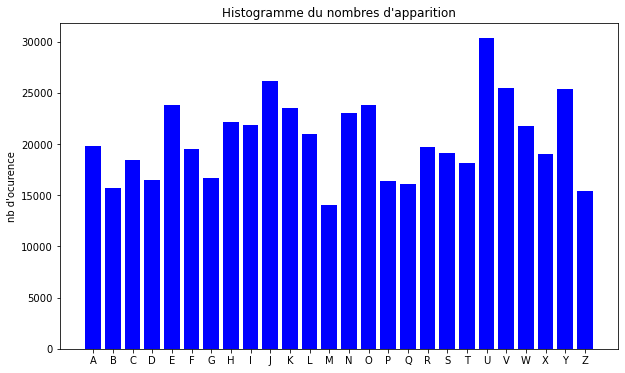

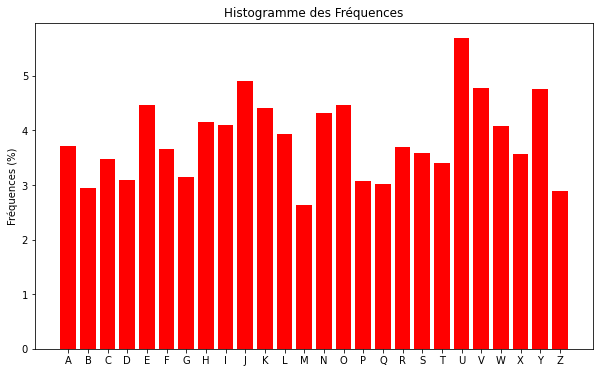

In [33]:
def ecrire_dans_fichier(texte, nom_fichier_sortie):
    try:
        with open(nom_fichier_sortie, 'w') as fichier:
            fichier.write(texte)
        print(f"Le texte a été écrit dans le fichier {nom_fichier_sortie}.")
    except IOError as e:
        print(f"Erreur lors de l'écriture dans le fichier {nom_fichier_sortie}: {e}")


        
        
        
fichier_de_sortit = "93Out.txt"

chaine = lire_fichier_to_chaineV2("OUT/93Out.txt")

print("\nchiffrement du texte 93.txt\n")

cle = "EWFJHGDQABCRKU"
chiffre_93 = chiffrement(chaine,cle)
print(f"chiffrement avec {cle}: {chiffre_93}\n")

ecrire_dans_fichier(chiffre_93,"OUT/chiffreOutvi.txt")


# écrire texte chiffre dans un fichier

print("histogramme\n")

fichier_de_sortit_crypted = "chiffreOutvi.txt"

# calcul nb apparition crypte
fichier = lire_fichier_apparition(fichier_de_sortit_crypted)

# calcule des frequences crypté
frequence = frequences(fichier)

# écrire les freq dans un fichier
write_frequences_in_file(frequence, "freq_Outvi.txt")

# créeation histogrammes
histogrammes("freq_Outvi.txt",fichier_de_sortit_crypted)





Faire de même avec les histogrammes de fréquences d'apparition des bigrammes sur le texte chiffré. 

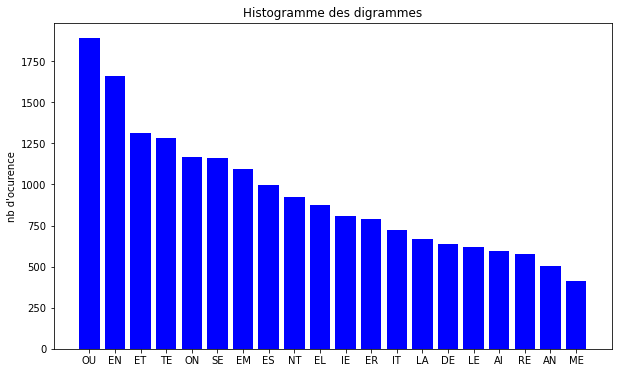

histogramme terminé. Résultat sauvegardé dans Image/histo_bigramme.png


In [34]:
#création histogramme digramme
res_nb_digrammes = nb_digrammes(chiffre_93)

histogrammes_ord_bigrammes(res_nb_digrammes)

**Question bonus :** Quelle serait, selon vous, la clé la plus robuste ?

VOTRE REPONSE ICI

In [35]:
#selon moi la clé la plus robuste pour le chiffrement de Vigenère serait longue, générée de manière aléatoire et ne") 
#dois etre utilisé pour crypter seulement un message unique.